In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
df = pd.read_csv('datasets/assignment3-data.csv', delimiter=',')

In [5]:
df

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562
29365,GLN,375,B,-117.428541,133.019506
29366,ILE,376,B,-113.586448,112.091970
29367,ASN,377,B,-100.668779,-12.102821


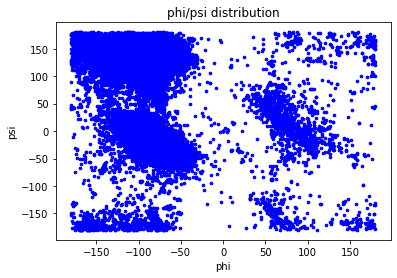

In [6]:
# 1.a - Scatter plot phi/psi

# Open figure + axis
fig, ax = plt.subplots()

# Plot datas
ax.scatter(x=df['phi'],y=df['psi'],c='Blue',s=7)

# Set labels
ax.set_title('phi/psi distribution')
ax.set_xlabel('phi')
ax.set_ylabel('psi')

# Scales & sizes
# plt.xscale('log')
plt.rcParams["figure.figsize"] = (16, 12)

# Draw the graph
plt.show()

Text(0.5, 1.0, 'Heatmap')

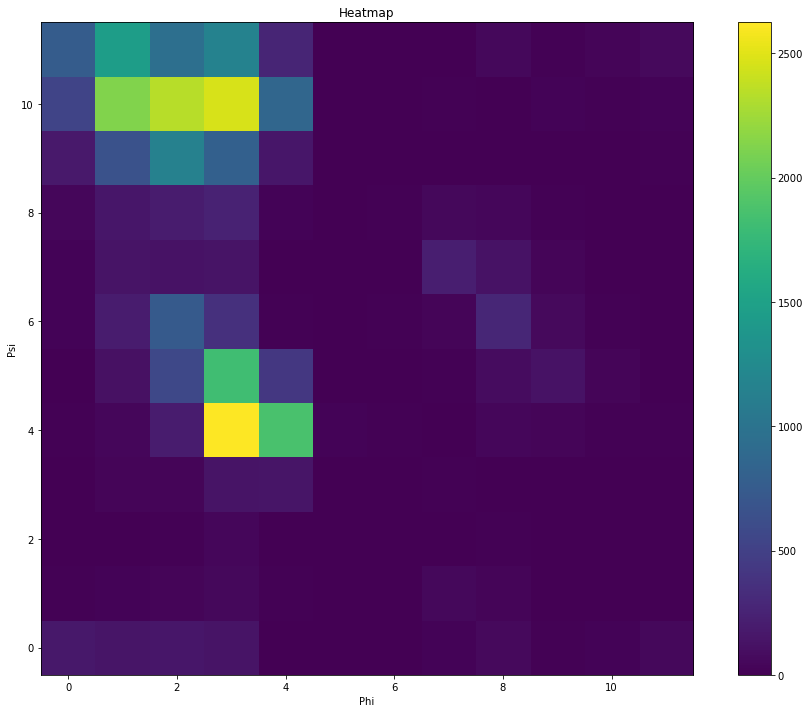

In [7]:
# 1.b - Binning by 50
heatmap, xedges, yedges = np.histogram2d(df['phi'], df['psi'], bins=(12,12))

# Plot graph
plt.imshow(heatmap.T, origin='lower') # Lower origin to match previous graph
plt.colorbar() # Shows color bar
plt.title('Heatmap') # Graph parameters
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('Heatmap')

<function matplotlib.pyplot.show(close=None, block=None)>

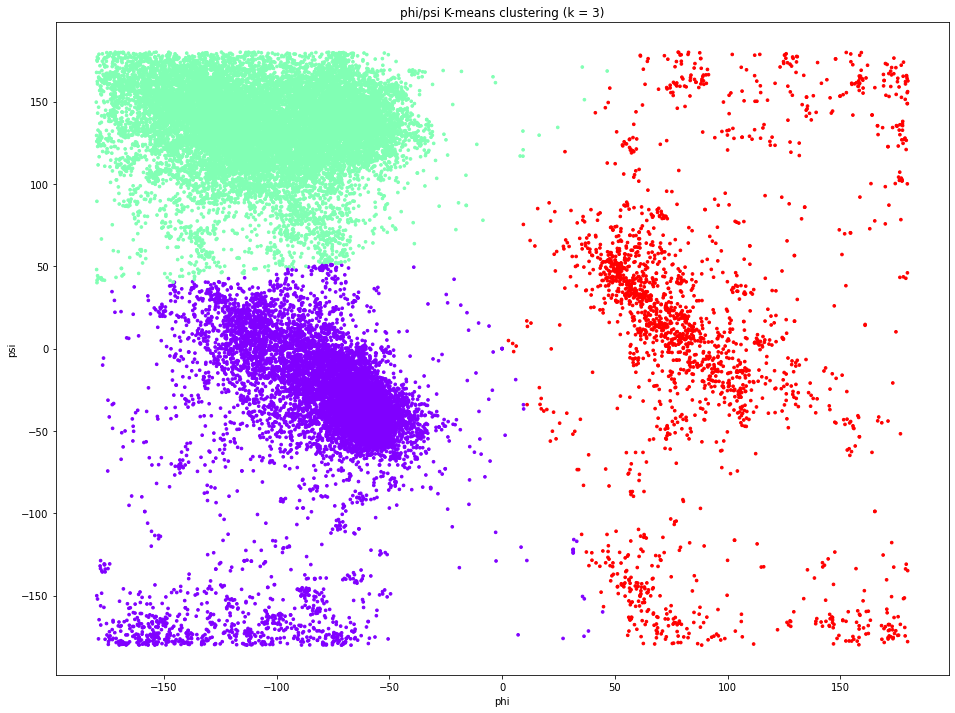

In [8]:
# K-mean

# Gets data from dataframe
x = df.iloc[:,3:5]

# KMeans model
kmeans = KMeans(3)
kmeans.fit(x)

# Predicts with KMeans
identified_clusters = kmeans.fit_predict(x)

# Prints KMeans graph

clustered_data = df.copy()
clustered_data['clusters'] = identified_clusters 
plt.scatter(clustered_data['phi'],clustered_data['psi'],c=clustered_data['clusters'],cmap='rainbow',s=7)
plt.rcParams["figure.figsize"] = (5, 4)
plt.title('phi/psi K-means clustering (k = 3)')
plt.xlabel('phi')
plt.ylabel('psi')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

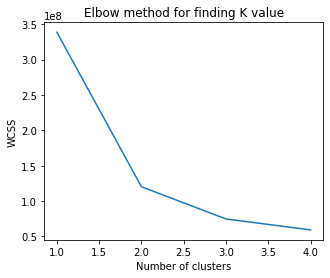

In [9]:
# Elbow method

wcss=[]
for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,5)
plt.plot(number_clusters,wcss)
plt.title('Elbow method for finding K value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.rcParams["figure.figsize"] = (12, 8)
plt.show

[ 2212 24541 15946 ... 22807 12023 10570]
4369


<function matplotlib.pyplot.show(close=None, block=None)>

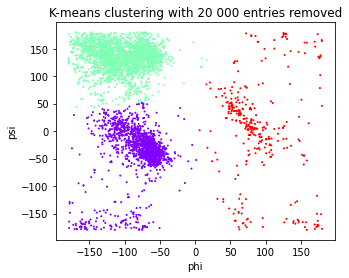

In [11]:
# Subset stability

# Removing 15000 random entries from dataset
remove_n = 25000
df_randomised_deletion = df
drop_indices = np.random.choice(df_randomised_deletion.index, remove_n, replace=False)
df_randomised_deletion = df_randomised_deletion.drop(drop_indices)
print(drop_indices)
print(len(df_randomised_deletion))

# K-means
x = df_randomised_deletion.iloc[:,3:5]

# KMeans model
kmeans = KMeans(3)
kmeans.fit(x)

# Predicts with KMeans
identified_clusters = kmeans.fit_predict(x)

# Prints KMeans graph
clustered_data = df_randomised_deletion.copy()
clustered_data['clusters'] = identified_clusters 
plt.scatter(clustered_data['phi'],clustered_data['psi'],c=clustered_data['clusters'],cmap='rainbow',s=1)
plt.rcParams["figure.figsize"] = (5, 4)
plt.title('K-means clustering with 20 000 entries removed')
plt.xlabel('phi')
plt.ylabel('psi')
plt.show


In [68]:
X = df.loc[:, ["phi", "psi"]].values.reshape(-1, 2)
X_rad = X*np.pi/180

In [69]:
def train_k_means(n_clusters, X):
    label_k_means_predict = []
    k_means_tab = []
    for k in range(0, n_clusters):
        k_means = KMeans(n_clusters=k+1, random_state=0).fit(X)
        #print("K {} W {} Cluster Centers {}".format(k, w, k_means.cluster_centers_))
        k_means_tab.append(k_means)
        label_k_means_predict.append(k_means.predict(X))
    return k_means_tab, label_k_means_predict


In [70]:
def print_k_means_cluster(k, X_):
    k_means_tab, label_k_means_predict =  train_k_means(k, X_)
    
    k-=1
    #Getting unique labels
    i_labels = np.unique(label_k_means_predict[k])

    #plotting the results:
    for i in i_labels:
        plt.scatter(X_[label_k_means_predict[k] == i , 0] , X_[label_k_means_predict[k] == i , 1] ,s=5, label = i+1)

    centroids = k_means_tab[k].cluster_centers_
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.xlabel('phi (rad)')
    plt.ylabel('psi (rad)')
    plt.legend()
    plt.figure().set_size_inches(30, 30, forward=True)
    plt.show()


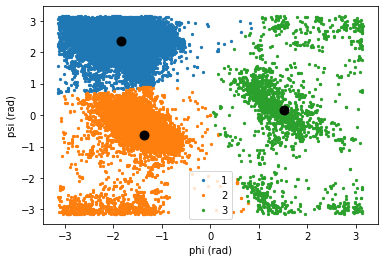

<Figure size 2160x2160 with 0 Axes>

In [71]:
# print k clusters 
k = 3
print_k_means_cluster(k, X_rad)

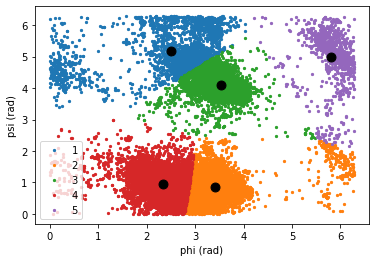

<Figure size 2160x2160 with 0 Axes>

In [218]:
# We can shift by pi/2 
X_rad_shift = (X_rad - np.pi/2) % (2*np.pi)
print_k_means_cluster(5, X_rad_shift)

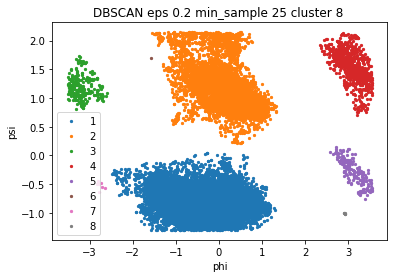

<Figure size 2160x2160 with 0 Axes>

In [175]:
#DBSCAN
#max_distance = 0.20
#min_samp = 30

#plt.subplot(231)
print_dbscan_cluster(0.2, 25, X_rad_shift)


#plt.subplot(232)
#print_dbscan_cluster(0.2, 25, X_rad_shift)
#plt.subplot(233)
#print_dbscan_cluster(0.2, 20, X_rad_shift)

#plt.figure().set_size_inches(50, 20, forward=True)
plt.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=1, 
                    wspace=0.35, 
                    hspace=0.5)
plt.show()


In [204]:
X_residue = df.loc[:, ["residue name", "phi", "psi"]].values.reshape(-1, 3)
X_residue_rad = X_residue.copy()
X_residue_rad[:, 1] = (( X_residue[:,1]*np.pi/180 ) - np.pi/2) % 2*np.pi
X_residue_rad[:, 2] = ((X_residue_rad[:, 2]*np.pi/180) - np.pi/2) % 2*np.pi
X_residue_rad_tab = []

I : -1
I : 0
I : 1
I : 2
I : 3
I : 4
I : 5
I : 6
I : 7


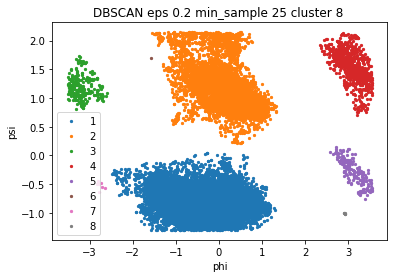

<Figure size 2160x2160 with 0 Axes>

In [205]:
print_dbscan_cluster(0.2, 25, X_rad_shift)


In [207]:
X_residue_rad_tab

[array([['TYR', 4.525151388864519, 3.719644719423049]], dtype=object),
 array([['GLY', 2.01319965765765, 3.8011252110424847],
        ['GLY', 2.212691394353496, 4.258990908784487],
        ['GLY', 2.400519342230408, 4.161479436626266],
        ['GLY', 1.9651508594093343, 4.730284532300983],
        ['GLY', 1.972917305943687, 4.881072841821048],
        ['GLY', 1.9130752625653753, 4.558930928090368],
        ['GLY', 2.004234383175377, 4.580878022228209],
        ['GLY', 2.1421418171604434, 4.72558281725771]], dtype=object),
 array([['ASN', 4.494271422576253, 1.5815031611540011],
        ['ASN', 4.477700685773637, 1.7005639275615596],
        ['ASN', 4.529321842166062, 1.65014894648922],
        ['ASN', 4.550516762786265, 1.6207055588219414],
        ['ASN', 4.467638130606506, 1.6728356029835123]], dtype=object)]

<BarContainer object of 3 artists>

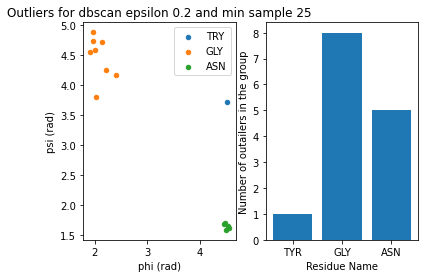

In [221]:
plt.subplot(121)
plt.scatter(X_residue_rad_tab[0][:, 1] , X_residue_rad_tab[0][:, 2] ,s=20, label='TRY')
plt.scatter(X_residue_rad_tab[1][:, 1] , X_residue_rad_tab[1][:, 2] ,s=20, label='GLY')
plt.scatter(X_residue_rad_tab[2][:, 1] , X_residue_rad_tab[2][:, 2] ,s=20, label='ASN')
plt.xlabel('phi (rad)')
plt.ylabel('psi (rad)')
plt.legend()

plt.title('Outliers for dbscan epsilon 0.2 and min sample 25')
plt.subplot(122)
columns = ['TYR', 'GLY', 'ASN']
plt.xlabel('Residue Name')
plt.ylabel('Number of outailers in the group')
values =  [len(X_residue_rad_tab[0]), len(X_residue_rad_tab[1]), len(X_residue_rad_tab[2])]

plt.bar(columns, values)


In [201]:
def print_dbscan_cluster(max_dist, min_samp, X_):
    # Standardize features by removing the mean and scaling to unit variance. -> margin the decision bourdaries -> get better clusters
    X_ = StandardScaler().fit_transform(X_)
    
    # epsilon -> radius of the cercle to detect neighboors 
    # min_samp -> minimum sample in the radius (depends on the density of the cluster. DBSCAN means for Density based )
    
    db = DBSCAN(eps=max_dist, min_samples=min_samp).fit(X_)
    labels = np.unique(db.labels_)
    # Number of clusters in labels, ignoring noise if present. Clusters are the len of the data minus the noise
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1) # count the number of -1 meaning the noise

    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    #plotting the results:
    for i in labels:
        class_member_mask = db.labels_ == i
        print("I : "+str(i))
        if i != -1: # noise
            if i > 4:
                xx = X_residue_rad[class_member_mask & core_samples_mask]
                X_residue_rad_tab.append(xx)
                
            xx = X_[class_member_mask & core_samples_mask]
            plt.scatter(xx[:, 0] , xx[:, 1] ,s=5, label = i+1)

    plt.xlabel('phi')
    plt.ylabel('psi')
    plt.title('DBSCAN eps {} min_sample {} cluster {} '.format(max_dist, min_samp, n_clusters_))
    plt.legend()
    plt.figure().set_size_inches(30, 30, forward=True)


,residue name,position,chain,phi,psi
1,PRO,11,A,-44.283210,136.002076
17,PRO,27,A,-49.944645,-25.888991
68,PRO,79,A,-76.452014,97.745207
110,PRO,121,A,-53.054020,-27.254912
123,PRO,134,A,-66.751364,94.099782
...,...,...,...,...,...
29284,PRO,288,B,-54.565923,-42.141418
29339,PRO,349,B,-66.803083,136.260650
29340,PRO,350,B,-59.612140,160.048387
29347,PRO,357,B,-48.679835,135.208297


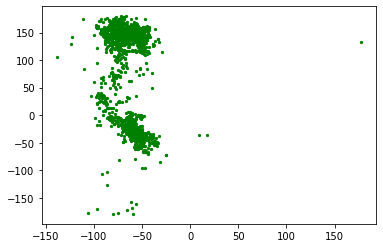

In [171]:
# The data file can be stratified by amino acid residue type. 
# Use DBSCAN to cluster the data that have residue type PRO.
x_pro = df[df["residue name"] == "PRO"]
X = x_pro.loc[:, ["phi", "psi"]].values.reshape(-1, 2)

plt.scatter(X[:, 0], X[:, 1], s=5, c='g')

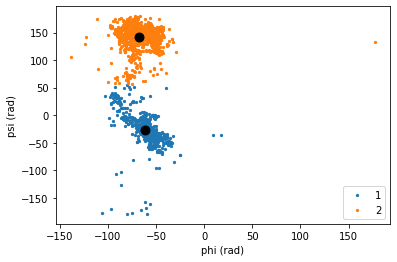

<Figure size 2160x2160 with 0 Axes>

In [119]:
print_k_means_cluster(2, X)

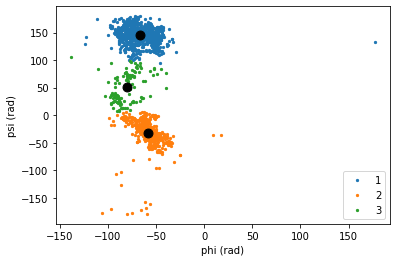

<Figure size 2160x2160 with 0 Axes>

In [120]:
print_k_means_cluster(3, X)

In [142]:
df

,residue name,position,chain,phi,psi
0,LYS,10,A,-149.312855,142.657714
1,PRO,11,A,-44.283210,136.002076
2,LYS,12,A,-119.972621,-168.705263
3,LEU,13,A,-135.317212,137.143523
4,LEU,14,A,-104.851467,95.928520
...,...,...,...,...,...
29364,GLY,374,B,-147.749557,155.223562
29365,GLN,375,B,-117.428541,133.019506
29366,ILE,376,B,-113.586448,112.091970
29367,ASN,377,B,-100.668779,-12.102821


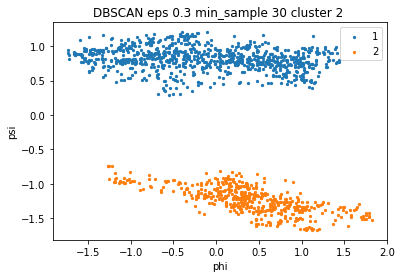

<Figure size 2160x2160 with 0 Axes>

In [137]:
#DBSCAN
max_distance = 0.3
min_samp = 30


print_dbscan_cluster(max_distance, min_samp, X)

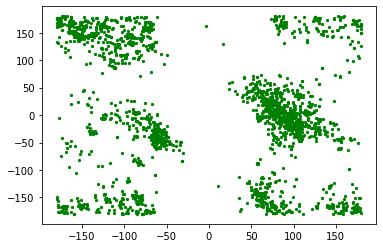

In [143]:
# Now use DBSCAN to cluster the data that have residue type GLY
x_pro = df[df["residue name"] == "GLY"]
X = x_pro.loc[:, ["phi", "psi"]].values.reshape(-1, 2)
plt.scatter(X[:, 0], X[:, 1], s=5, c='g')

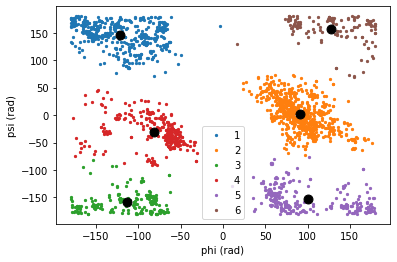

<Figure size 2160x2160 with 0 Axes>

In [150]:
print_k_means_cluster(6, X)

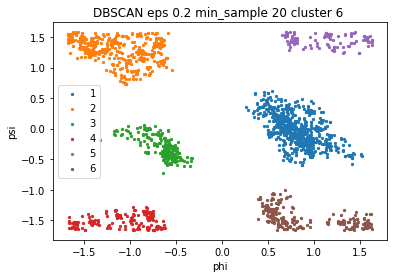

<Figure size 2160x2160 with 0 Axes>

In [151]:
#DBSCAN
max_distance = 0.2
min_samp = 20

print_dbscan_cluster(max_distance, min_samp, X)

In [153]:
len(X)

2176